In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import torch
import torch.optim as optim
from typing import Callable

In [2]:
# Generate non-linear data

n = 400
dim = 3
x = torch.rand(n, dim).float()
print('Input tensor shape =', x.shape)

Input tensor shape = torch.Size([400, 3])


In [3]:
# Initialize weights and bias

weights = torch.tensor([[3.0, -3.0, 6.0]]).T
bias = torch.tensor([[8]])
print('Weights shape =', weights.shape)
print('Bias shape =', bias.shape)

# non-linear 3 variable function we want to learn
y_true = (torch.einsum('ij, jk -> ik', (x**3),  weights) + torch.einsum('ij, jk -> ik', (x**2),  weights) + torch.einsum('ij, jk -> ik', x, weights) + bias).float()
print('Function output shape =', y_true.shape)

Weights shape = torch.Size([3, 1])
Bias shape = torch.Size([1, 1])
Function output shape = torch.Size([400, 1])


In [4]:
# Hyperparamter initializations

input_dim = dim
output_dim = 1
hidden_dim = 16

learning_rate = 0.01
num_epochs = 100

In [5]:
class Model(torch.nn.Module):
  def __init__(self, input_dim, output_dim, hidden_dim):
    super(Model, self).__init__()

    # Initialize weights and biases for each of the layers
    self.W1 = torch.nn.Parameter(torch.randn(input_dim, hidden_dim), requires_grad=True)
    self.b1 = torch.nn.Parameter(torch.randn(hidden_dim), requires_grad=True)
    self.W2 = torch.nn.Parameter(torch.randn(hidden_dim, hidden_dim), requires_grad=True)
    self.b2 = torch.nn.Parameter(torch.randn(hidden_dim), requires_grad=True)
    self.W3 = torch.nn.Parameter(torch.randn(hidden_dim, output_dim), requires_grad=True)
    self.b3 = torch.nn.Parameter(torch.randn(output_dim), requires_grad=True)

  def forward(self, x):
    h1 = torch.relu(torch.matmul(x, self.W1) + self.b1)
    h2 = torch.relu(torch.matmul(h1, self.W2) + self.b2)
    y_pred = torch.matmul(h2, self.W3) + self.b3
    return y_pred

In [6]:
model = Model(input_dim, output_dim, hidden_dim)

# Loss function and optimizer
loss = torch.nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [7]:
# Training loop

loss_ = []
for epoch in range(num_epochs):
  optimizer.zero_grad()
  y_pred = model(x)
  loss_value = loss(y_pred, y_true)
  print(f'Epoch {epoch}, loss {loss_value}')
  loss_value.backward()
  optimizer.step()
  loss_.append(loss_value.detach().numpy())

Epoch 0, loss 471.39617919921875
Epoch 1, loss 415.1826477050781
Epoch 2, loss 363.5268249511719
Epoch 3, loss 316.3466491699219
Epoch 4, loss 273.5728454589844
Epoch 5, loss 235.03939819335938
Epoch 6, loss 200.771484375
Epoch 7, loss 170.58575439453125
Epoch 8, loss 144.2161102294922
Epoch 9, loss 121.49334716796875
Epoch 10, loss 102.2643814086914
Epoch 11, loss 86.31219482421875
Epoch 12, loss 73.26119232177734
Epoch 13, loss 62.981014251708984
Epoch 14, loss 54.931358337402344
Epoch 15, loss 48.81047821044922
Epoch 16, loss 44.38833999633789
Epoch 17, loss 41.354347229003906
Epoch 18, loss 39.490516662597656
Epoch 19, loss 38.43132781982422
Epoch 20, loss 37.892086029052734
Epoch 21, loss 37.560638427734375
Epoch 22, loss 37.219139099121094
Epoch 23, loss 36.716285705566406
Epoch 24, loss 35.91016387939453
Epoch 25, loss 34.7641487121582
Epoch 26, loss 33.31611251831055
Epoch 27, loss 31.613788604736328
Epoch 28, loss 29.753583908081055
Epoch 29, loss 27.849903106689453
Epoch 30, 

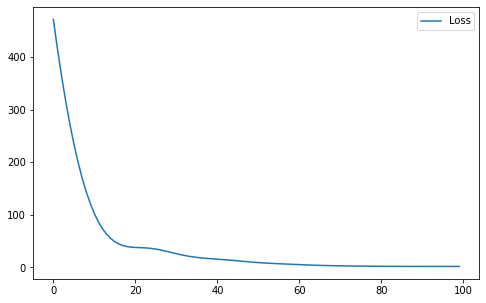

In [8]:
# Plot epoch vs loss

plt.figure(figsize=(8, 5))
plt.plot(range(num_epochs), loss_, label='Loss')
plt.legend()

In [9]:
# Initialise model and loss
model = Model(input_dim, output_dim, hidden_dim)

# Loss function and optimizer
loss = torch.nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# One forward and backward pass for visualization
optimizer.zero_grad()
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_value.backward()
optimizer.step()

y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

tensor(148.3741, grad_fn=<MseLossBackward0>)
tensor(127.0390, grad_fn=<MseLossBackward0>)


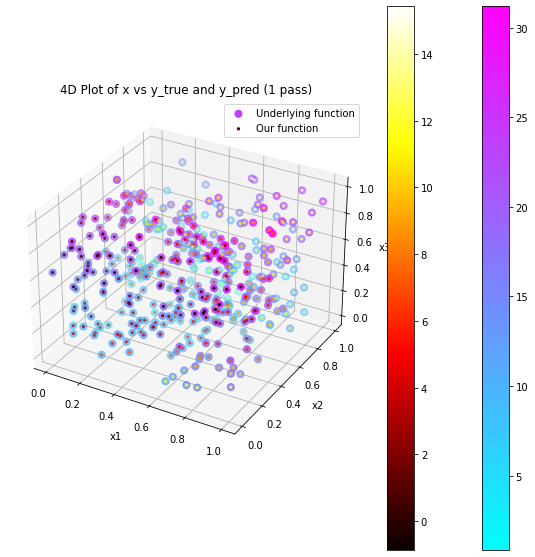

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_true, cmap='cool', label='Underlying function', s=50)
fig.colorbar(sc)
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_pred.detach().numpy(), cmap='hot', label='Our function', marker='.')
fig.colorbar(sc)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('4D Plot of x vs y_true and y_pred (1 pass)')

plt.legend()
plt.show()